In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mcolors
import numpy as np
from levels import *
%matplotlib inline

# Define the colors for the modified blue gradient
colors = ['#A6B5CC', '#008B8B', '#000000', '#FF0000', '#FF00FF']
color_positions = [0.0, 0.8, 0.85, 0.92, 1.0]
# Create a custom colormap using LinearSegmentedColormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_blue_gradient", list(zip(color_positions, colors)))


def printMap(level):
    pixel_plot = plt.figure()
    pixel_plot.add_subplot()
    plt.title("Map")
    pixel_plot = plt.imshow(level, cmap=custom_cmap, interpolation='nearest', origin='upper', vmax=11)
    plt.colorbar(pixel_plot)
    plt.show()

def putPixel(level, position, value):
    x = position[0]
    y = position[1]
    level[y][x] = value

In [2]:
# Ratkaistava ongelma
from search_algos import *
import random

#alkutilanne:
starts = [[random.randint(1, 63), random.randint(1, 63)] for _ in range(5)]
#start = [0, 0]
finishes = [[random.randint(1, 63), random.randint(1, 63)] for _ in range(5)]
#finish = [60, 60]

initialState = starts[0]
goalState = finishes[0]

# actionit taulukoituna: (0 suuntaa)
actions = [[-1, 0], [1, 0],[0, -1], [0, 1]]
#actions = [[-1, 0], [1, 0],[0, -1], [0, 1], [-1, -1], [1, 1], [1, -1], [-1, 1]]

# Laillisen tilan tarkastusfunktio:
def isLegalState(state):
    x = state[0]
    y = state[1]
    if( x < 0 or y < 0):
        return False
    if( y >= len(level) or x >= len(level[y]) ):
        return False
    return level[y][x] < 9 #estetään seinien läpi kävely


    


In [3]:
import time

# leveysuunnattu dijkstra:
#goaledNode, openList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestG)

# ahne dijkstra:
#goaledNode, openList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestH)

# A*
start_time = time.time()
goaledNode, openList, closedList = searhPathFindInGrid(initialState, goalState, isLegalState, level, actions, popBestF)
end_time = time.time()
execution_time_BestF = end_time - start_time
name = "A*"


suoritusaika = (f"Suoritusaika: {execution_time_BestF:2f} sekuntia")


  nimi  suoritusaika kustannus  solmut
0   A*      0.115438      70.0    2541


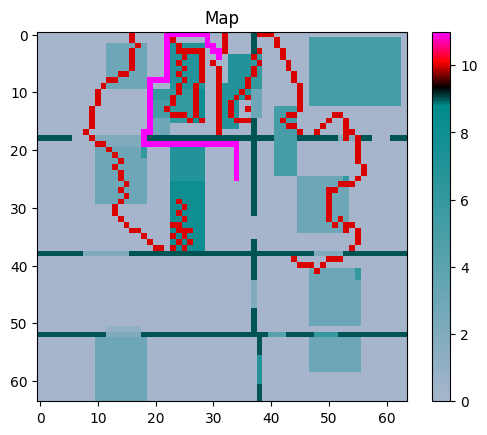

In [4]:
import pandas as pd


def printNodeOnLevel(node):
    putPixel(level, node.state, 11)

def printOpenNodeOnLevel(node):
    putPixel(level, node.state, 10)

traversePath(goaledNode, printNodeOnLevel)

for openNode in openList:
    printOpenNodeOnLevel(openNode)

solmut = len(openList) + len(closedList)

#print(suoritusaika)
kustannus = str(goaledNode.totalG)

#print("Total cost of path: " + str(goaledNode.totalG))
#printMap(level)


# Oletetaan, että meillä on DataFrame
data = {
    "nimi": [name],
    "suoritusaika": [execution_time_BestF],
    "kustannus": [kustannus],
    "solmut": [solmut],
    "kuva": [level]
}

df = pd.DataFrame(data)


print(df[["nimi", "suoritusaika", "kustannus", "solmut"]])
printMap(data["kuva"][0])






[Source](https://www.youtube.com/watch?v=Q30m_-8nh3Y&list=PLadRxrHJkUqzoVmzO-CQWwhO93IAjChOp&index=18)